<a href="https://colab.research.google.com/github/samuelquitiang/CUFICO_2019_2/blob/master/Parciales/Parcial2/N1152222545/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, read a file .root and plot their data in a histogram, creat data following a distribution and try to fit the previous data with it 

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [2]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
binutils set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following additional packages will be installed:
  libapr1 libaprutil1 libdpkg-perl libserf-1-1 libsvn1
Suggested packages:
  debian-keyring bz

### 2. Mount the drive to get the root binary and untar it 

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
DatosParcial2		  root_build_google_yikes.tar
DatosResonancia.root	  Temporal
FFT_imagen.ipynb	  TrimmedTree.root
FFT.ipynb		  TTreeExcercise.ipynb
FLUTEMI.WAV


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [6]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
drwx------  4 root root 4.0K Nov 18 06:52 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
import numpy as np
import scipy.integrate as sc
from random import uniform, random
from numpy import pi
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D 
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [8]:
import ROOT

Welcome to JupyROOT 6.14/04


### Se implementa el algoritmo de Metropolis

In [0]:

np.random.seed(0)
def P(x,mu,c):
  #l=sc.quad(lambda x:np.exp(-x)*np.cos(x*((phi-mu)/c)+2.*x*np.log(x/c)/pi),0,np.inf)
  #l=sp.integrate(sp.exp(-x)*sp.cos((x*(phi-mu)/c)+(2.*x*sp.log(x/c)/pi)),(x,0,sp.oo))
  #m=pi*c
  L=ROOT.TMath.Landau(x,mu,c)
  return L
def Met(P,k,l,N): 
  lim=2000
  A=[uniform(0,lim)]   
  while len(A) < N:
    if  P(A[-1],k,l) != 0:
      phi1 = uniform(0,lim)
      ds = -np.log(P(phi1,k,l)/P(A[-1],k,l))
      if ds<0:
        A.append(phi1)
      elif ds>0:
         v=random()
         p=P(phi1,k,l)/P(A[-1],k,l)
         if v<p:
           A.append(phi1)
  A=np.array(A)       
  return  A 
   

### 1. Se leen los datos del archivo .root y se grafican en un histograma 

In [10]:
DataChain=ROOT.TChain("SystemTree")
DataChain.Add("/content/drive/My Drive/Colab Notebooks/N1152222545.root")

1

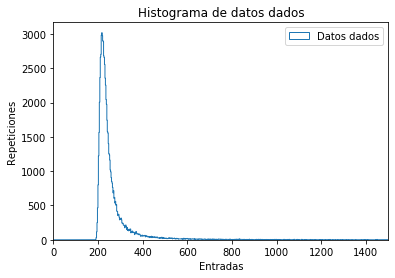

In [11]:
Prob = ROOT.TH1F( 'DiMuM1', 'Di-muon mass distribution', 200,0 , 1500 )
E=[]
for i in DataChain:
  E.append(i.x)
  Prob.Fill(i.x)
  #print(i.x)
#plt.plot(E)
#print(np.mean(E),np.std(E))
h=plt.hist(E,bins='auto',range=(0,1500),label=["Datos dados"],histtype='step') #variable que se usara para los calculos 
plt.title('Histograma de datos dados')
plt.xlabel('Entradas')
plt.ylabel('Repeticiones')
plt.legend()
plt.xlim(0,1500)
plt.show()


 FCN=223.516 FROM MIGRAD    STATUS=CONVERGED     204 CALLS         205 TOTAL
                     EDM=3.43865e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.92314e+04   3.17597e+02  -4.14942e+00   1.56598e-06
   2  MPV          2.19957e+02   7.83581e-02  -2.36696e-04   1.38151e-02
   3  Sigma        1.01046e+01   4.08964e-02   1.34337e-05   7.71683e-01


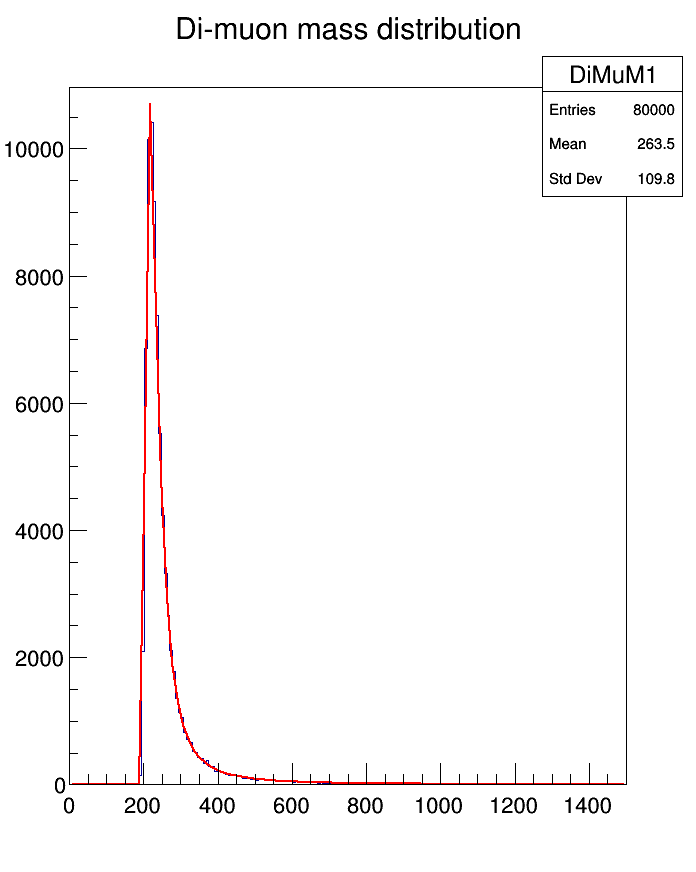

In [12]:

c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
Prob.Draw()
f=ROOT.TF1('f','landau')
Prob.Fit(f,'S')
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

In [31]:
print("Numero de bins en el histograma: %i" %(h[0].size))

print(np.mean(E),np.std(E))
print(len(E))
print(max(h[0]))
print(h[0].size)
Nbin=h[0].size


Numero de bins en el histograma: 715
328.6167930463791 2754.35278470391
80000
3018.0
715


### 2. Producir distintos datos con el metodo de metropolis para distintos $\mu$ y $c$ para sacar el CHI2 y ver cual es mejor 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


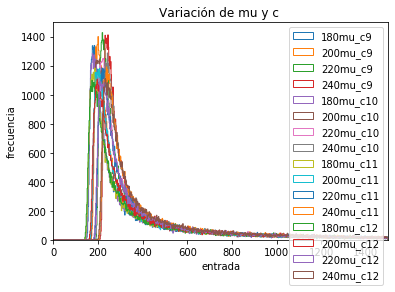

In [37]:
C1=[9,10,11,12]
MU1=[180,200,220,240]
N=len(E)
Nbin=h[0].size   #Número de bins que se usará
lim=3000 #numero maximo para creación de datos 
DM=[] #datos generados a distintos mu  
Hist=[] 
for i in C1:   
  for j in MU1:
    DM.append(Met(P,j,i,N))
    Hist.append(plt.hist([DM[-1]],bins=Nbin,range=(0,1500),label=[str(j)+"mu_c"+str(i)],histtype='step'))
plt.title("Variación de mu y c ")
plt.legend()
plt.xlim(0,1500)
plt.xlabel("entrada")
plt.ylabel("frecuencia")
plt.show()



#### 3. Con los conjuntos de datos se saca el $\chi^2$ respecto a los datos suministrados y posteriormente se grafica  $\chi^2$ vs $\mu$ y $\chi^2$ vs $c$ 

In [0]:

def CHI2(x,y):
   chi2=0
   N=x.size
   for i in range(N):
     num=x[i]-y[i]
     if x[i] != 0: 
       chi2 += num**2/x[i]
     elif y[i] != 0:
       chi2 += num**2/y[i]
     assert(x.size==y.size)  
   return chi2/N
Chi2_1=[]
for i in Hist:
  Chi2_1.append(CHI2(h[0],i[0]))


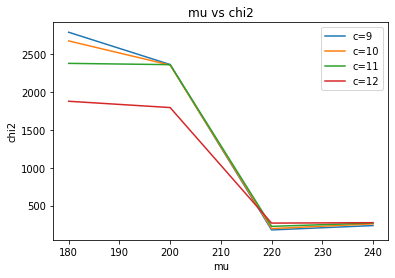

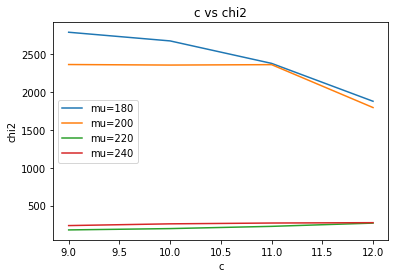

In [39]:
plt.figure()
plt.plot(MU1,Chi2_1[0:4],label="c=9")
plt.plot(MU1,Chi2_1[4:8],label="c=10")
plt.plot(MU1,Chi2_1[8:12],label="c=11")
plt.plot(MU1,Chi2_1[12:16],label="c=12")
plt.title("mu vs chi2")
plt.xlabel("mu")
plt.ylabel("chi2")
plt.legend()

plt.figure()
plt.plot(C1,Chi2_1[0:13:4],label="mu=180")
plt.plot(C1,Chi2_1[1:14:4],label="mu=200")
plt.plot(C1,Chi2_1[2:15:4],label="mu=220")
plt.plot(C1,Chi2_1[3:16:4],label="mu=240")
plt.xlabel("c")
plt.ylabel("chi2")
plt.title("c vs chi2")
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


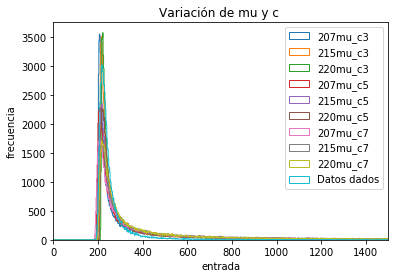

In [53]:
MuO=[207,215,220]
CO=[3,5,7]
N=len(E)
lim=2000 #numero maximo para creación de datos 
DM1=[] #datos generados a distintos mu  
Hist1=[] 
for i in CO:   
  for j in MuO:
    DM1.append(Met(P,j,i,N))
    Hist1.append(plt.hist(DM1[-1],bins=Nbin,range=(0,1500),label=str(j)+"mu_c"+str(i),histtype = 'step'))
plt.title("Variación de mu y c ")
plt.hist(E,bins=Nbin,range=(0,1500),label="Datos dados",histtype='step')
plt.xlim(0,1500)
plt.legend()
plt.xlabel("entrada")
plt.ylabel("frecuencia")
plt.show()


In [0]:
Chi2_0=[]
for i in Hist1:
  Chi2_0.append(CHI2(h[0],i[0]))


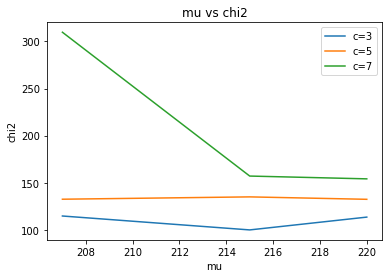

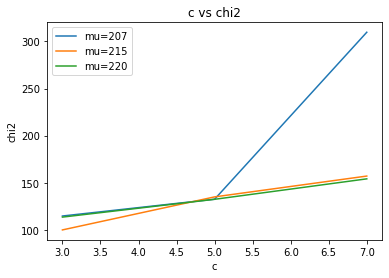

In [65]:
plt.figure()
plt.plot(MuO,Chi2_0[0:3],label="c=3")
plt.plot(MuO,Chi2_0[3:6],label="c=5")
plt.plot(MuO,Chi2_0[6:9],label="c=7")
plt.title("mu vs chi2")
plt.xlabel("mu")
plt.ylabel("chi2")
plt.legend()

plt.figure()
plt.plot(CO,Chi2_0[0:7:3],label="mu=207")
plt.plot(CO,Chi2_0[1:8:3],label="mu=215")
plt.plot(CO,Chi2_0[2:9:3],label="mu=220")
plt.xlabel("c")
plt.ylabel("chi2")
plt.title("c vs chi2")
plt.legend()

In [0]:
C=np.append(C1,CO)

MU=np.append(MU1,MuO)
Chi2=np.append(Chi2_1,Chi2_0)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot(C,MU,Chi2)
ax.set_xlabel('c')
ax.set_ylabel('Mu')
ax.set_zlabel('Chi2')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


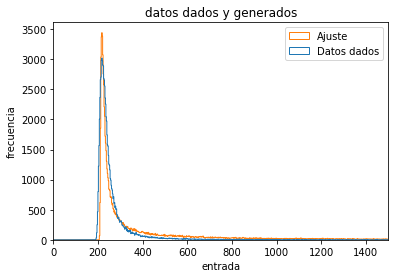

In [74]:
D=Met(P,217,3.15,N)
plt.hist([E,D],bins=Nbin,range=(0,1500),label=["Datos dados","Ajuste"],histtype='step')
plt.title("datos dados y generados")
plt.xlim(0,1500)
plt.legend()
plt.xlabel("entrada")
plt.ylabel("frecuencia")
plt.show()


715 715


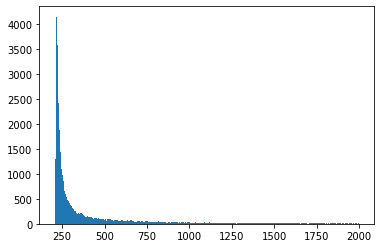

In [78]:
d=plt.hist(D,bins=Nbin)
print(h[0].size,d[0].size)

In [79]:
CHI2(h[0],d[0])


224.52268050031788